<a href="https://colab.research.google.com/github/Nvtai091729/LightRAG/blob/main/BAOCAO_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Kiểm tra GPU trong Google Colab
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.18.0
GPU Available: []


In [9]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import pandas as pd

# Đọc tập dữ liệu
file_path = '/content/student_dataset.csv'  # Đảm bảo tải file lên Colab hoặc Drive
data = pd.read_csv(file_path)

# Kiểm tra thông tin dữ liệu
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Student_ID                               10000 non-null  object
 1   Age                                      10000 non-null  int64 
 2   Gender                                   10000 non-null  object
 3   Study_Hours_per_Week                     10000 non-null  int64 
 4   Preferred_Learning_Style                 10000 non-null  object
 5   Online_Courses_Completed                 10000 non-null  int64 
 6   Participation_in_Discussions             10000 non-null  object
 7   Assignment_Completion_Rate (%)           10000 non-null  int64 
 8   Exam_Score (%)                           10000 non-null  int64 
 9   Attendance_Rate (%)                      10000 non-null  int64 
 10  Use_of_Educational_Tech                  10000 non-null  ob

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Loại bỏ cột không cần thiết
data.drop(columns=['Student_ID'], inplace=True)

# Mã hóa nhãn (Final_Grade: A, B, C, D, F thành số)
label_encoder = LabelEncoder()
data['Final_Grade'] = label_encoder.fit_transform(data['Final_Grade'])

# One-hot encoding cho biến phân loại
data = pd.get_dummies(data, columns=['Gender', 'Preferred_Learning_Style', 'Participation_in_Discussions',
                                     'Use_of_Educational_Tech', 'Self_Reported_Stress_Level'])

# Chia tập dữ liệu thành đầu vào (X) và nhãn (y)
X = data.drop('Final_Grade', axis=1)
y = data['Final_Grade']

# Chuẩn hóa dữ liệu đầu vào
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia tập huấn luyện (80%) và tập kiểm tra (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train: (8000, 22)
Shape of y_train: (8000,)


In [13]:
!pip install tensorflow


In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Reshape dữ liệu đầu vào cho CNN (mẫu, đặc trưng, 1 kênh)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Xây dựng mô hình CNN
cnn_model = models.Sequential([
    layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')  # 5 lớp cho 5 nhãn (A, B, C, D, F)
])

# Compile mô hình
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
history = cnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.3960 - loss: 1.2633 - val_accuracy: 0.7544 - val_loss: 0.5996
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7746 - loss: 0.5440 - val_accuracy: 0.8363 - val_loss: 0.4052
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8347 - loss: 0.3832 - val_accuracy: 0.8562 - val_loss: 0.3460
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8703 - loss: 0.3105 - val_accuracy: 0.8813 - val_loss: 0.2850
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8820 - loss: 0.2830 - val_accuracy: 0.8819 - val_loss: 0.2682
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8949 - loss: 0.2530 - val_accuracy: 0.8913 - val_loss: 0.2456
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9103 - loss: 0.2178 - val_accuracy: 0.8769 - val_loss: 0.2646
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9110 - loss: 0.2155 - val_accuracy: 0

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Khởi tạo các mô hình
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Huấn luyện các mô hình
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully!")


Logistic Regression trained successfully!
Decision Tree trained successfully!
Random Forest trained successfully!
SVM trained successfully!
KNN trained successfully!


In [16]:
import numpy as np

# Kiểm tra số chiều của y_test
print(y_test.shape)

# Nếu y_test đã là nhãn số nguyên (1 chiều), giữ nguyên:
if y_test.ndim == 1:
    y_test_classes = y_test
else:
    y_test_classes = np.argmax(y_test, axis=1)

print(y_test_classes)


(2000,)
6252    0
4684    3
1731    2
4742    1
4521    2
       ..
6412    0
8285    1
7853    0
1095    0
6929    3
Name: Final_Grade, Length: 2000, dtype: int64


In [17]:
import numpy as np

# Chuyển y_test thành mảng numpy
y_test = np.array(y_test)

# Xử lý tương tự như trên
if y_test.ndim == 1:
    y_test_classes = y_test
else:
    y_test_classes = np.argmax(y_test, axis=1)


In [18]:
y_pred = cnn_model.predict(X_test_cnn)

# Chuyển xác suất thành nhãn dự đoán
y_pred_classes = np.argmax(y_pred, axis=1)

# Đánh giá mô hình
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test_classes, y_pred_classes))


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 0.9305


In [19]:
print("y_test shape:", y_test.shape, "y_pred_classes shape:", y_pred_classes.shape)
print("y_test dtype:", y_test.dtype, "y_pred_classes dtype:", y_pred_classes.dtype)


y_test shape: (2000,) y_pred_classes shape: (2000,)
y_test dtype: int64 y_pred_classes dtype: int64


In [20]:
y_test = y_test.astype(int)
y_pred_classes = y_pred_classes.astype(int)


In [21]:
from sklearn.metrics import accuracy_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Đảm bảo y_test là dạng số nguyên
    if y_test.ndim > 1:
        y_test = np.argmax(y_test, axis=1)

    return accuracy_score(y_test, y_pred_classes)


In [22]:
import numpy as np

if 'pandas' in str(type(y_test)):
    y_test = y_test.to_numpy()

# Xử lý như trên



In [23]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Hàm đánh giá hiệu năng
def evaluate_model(model, X_test, y_test, is_cnn=False):
    if is_cnn:
        y_pred = model.predict(X_test)
        y_pred = np.argmax(y_pred, axis=1)  # Chuyển xác suất thành nhãn
    else:
        y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))
    return accuracy_score(y_test, y_pred)

# Đánh giá CNN (is_cnn=True để xử lý đầu ra softmax)
cnn_acc = evaluate_model(cnn_model, X_test_cnn, y_test, is_cnn=True)

# Đánh giá các mô hình truyền thống
for name, model in models.items():
    acc = evaluate_model(model, X_test, y_test)
    print(f"{name} Accuracy: {acc:.4f}")



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       533
           1       0.89      0.91      0.90       471
           2       0.92      0.89      0.90       495
           3       0.96      0.95      0.95       501

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       533
           1       1.00      1.00      1.00       471
           2       1.00      1.00      1.00       495
           3       1.00      1.00      1.00       501

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Logistic Regression Accuracy: 0.9990
              precision    recall  f1-score   support


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Khởi tạo và huấn luyện các mô hình
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully!")


Logistic Regression trained successfully!
Decision Tree trained successfully!
Random Forest trained successfully!
SVM trained successfully!
KNN trained successfully!


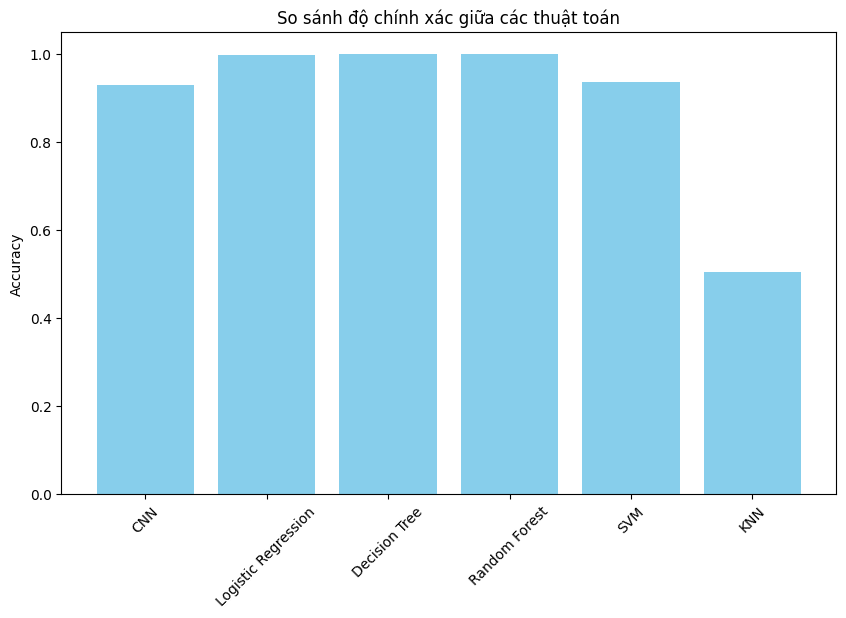

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Tạo danh sách tên mô hình và độ chính xác
model_names = ['CNN'] + list(models.keys())
accuracies = [cnn_acc] + [accuracy_score(y_test, model.predict(X_test)) for model in models.values()]

# Vẽ biểu đồ so sánh
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.ylabel('Accuracy')
plt.title('So sánh độ chính xác giữa các thuật toán')
plt.xticks(rotation=45)
plt.show()

